In [129]:
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [130]:
data = pd.read_csv('/Users/viktoriasazonova/Milk/output_file.csv')
data['TARGET'] = data['NAME'].apply(lambda x: 0 if x == 'milk' else 1)

print(data.head(2))

X = data.drop(columns=['NAME', 'CONCENTRATION', 'TARGET'])
y = data['TARGET']

print(X.shape, y.shape)

           NAME  CONCENTRATION      -0.8    -0.795     -0.79   -0.785  \
0  streptomycin   1.000000e-05 -0.000089 -0.000060 -0.000048 -0.00004   
1  streptomycin   1.000000e-07 -0.000087 -0.000084 -0.000082 -0.00008   

      -0.78    -0.775     -0.77    -0.765  ...  -0.755.1   -0.76.1  -0.765.1  \
0 -0.000039 -0.000035 -0.000032 -0.000029  ... -0.000037 -0.000037 -0.000038   
1 -0.000077 -0.000075 -0.000074 -0.000072  ... -0.000069 -0.000070 -0.000070   

    -0.77.1  -0.775.1   -0.78.1  -0.785.1   -0.79.1  -0.795.1  TARGET  
0 -0.000038 -0.000038 -0.000038 -0.000038 -0.000038 -0.000038       1  
1 -0.000070 -0.000070 -0.000071 -0.000071 -0.000071 -0.000072       1  

[2 rows x 1043 columns]
(1377, 1040) (1377,)


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки X:", X_train.shape)
print("Размер тестовой выборки X:", X_test.shape)
print("Размер целевой переменной обучающей выборки y:", y_train.shape)
print("Размер целевой переменной тестовой выборки y:", y_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Размер обучающей выборки X: (1101, 1040)
Размер тестовой выборки X: (276, 1040)
Размер целевой переменной обучающей выборки y: (1101,)
Размер целевой переменной тестовой выборки y: (276,)


In [132]:
def calculate_metrics(model, y_test, y_pred):
    model_name = model.__class__.__name__
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Оценка модели {model_name}: \nТочность: {accuracy:.4f} \nПолнота (Recall): {recall:.4f} \nF1-мера: {f1:.4f} \n")
    return accuracy, recall, f1

def train_model(model, X_train_scaled, y_train, X_test_scaled, y_test):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    calculate_metrics(model, y_test, y_pred)
    return model

In [133]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

model_train = {}
for name, model in models.items():
    model_train[name] = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    


Оценка модели LogisticRegression: 
Точность: 0.8986 
Полнота (Recall): 0.8986 
F1-мера: 0.9009 

Оценка модели KNeighborsClassifier: 
Точность: 0.9674 
Полнота (Recall): 0.9674 
F1-мера: 0.9671 

Оценка модели RandomForestClassifier: 
Точность: 0.9420 
Полнота (Recall): 0.9420 
F1-мера: 0.9420 

Оценка модели SVC: 
Точность: 0.9420 
Полнота (Recall): 0.9420 
F1-мера: 0.9404 

Оценка модели GradientBoostingClassifier: 
Точность: 0.9493 
Полнота (Recall): 0.9493 
F1-мера: 0.9489 



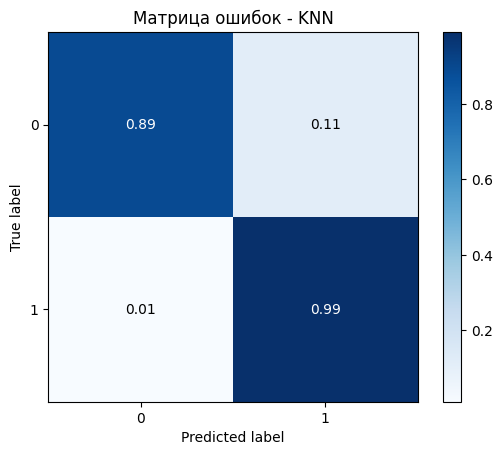

In [134]:
knn_model = model_train['K-Nearest Neighbors']
y_pred_knn = knn_model.predict(X_test_scaled)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn, normalize=True)
plt.title("Матрица ошибок - KNN")
plt.show()

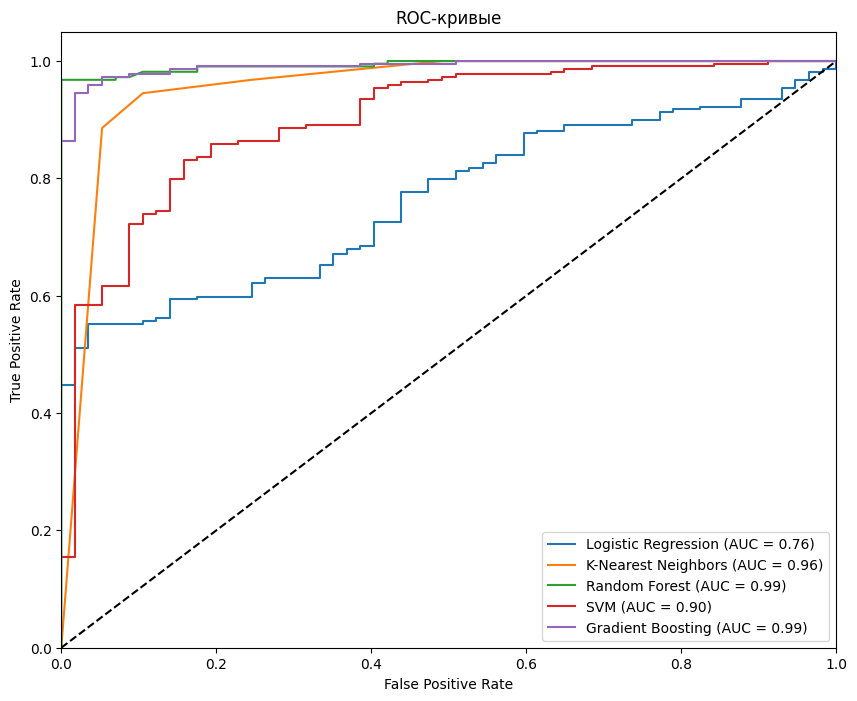

In [135]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier()
}

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc='lower right')
plt.show()

In [136]:
X = data.iloc[:, 2:].values
y = data["NAME"].values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Размер X_train:", X_train_scaled.shape)
print("Размер X_test:", X_test_scaled.shape)
print("Классы после кодировки:", label_encoder.classes_)

Размер X_train: (1101, 1041)
Размер X_test: (276, 1041)
Классы после кодировки: ['cefazoline' 'ceftiofur' 'milk' 'penicillin' 'streptomycin'
 'tetracycline']


In [137]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

model_train = {}
for name, model in models.items():
    model_train[name] = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

Оценка модели LogisticRegression: 
Точность: 0.9130 
Полнота (Recall): 0.9130 
F1-мера: 0.9129 

Оценка модели KNeighborsClassifier: 
Точность: 0.8696 
Полнота (Recall): 0.8696 
F1-мера: 0.8702 

Оценка модели RandomForestClassifier: 
Точность: 0.9130 
Полнота (Recall): 0.9130 
F1-мера: 0.9129 

Оценка модели SVC: 
Точность: 0.8841 
Полнота (Recall): 0.8841 
F1-мера: 0.8821 

Оценка модели GradientBoostingClassifier: 
Точность: 0.9457 
Полнота (Recall): 0.9457 
F1-мера: 0.9455 



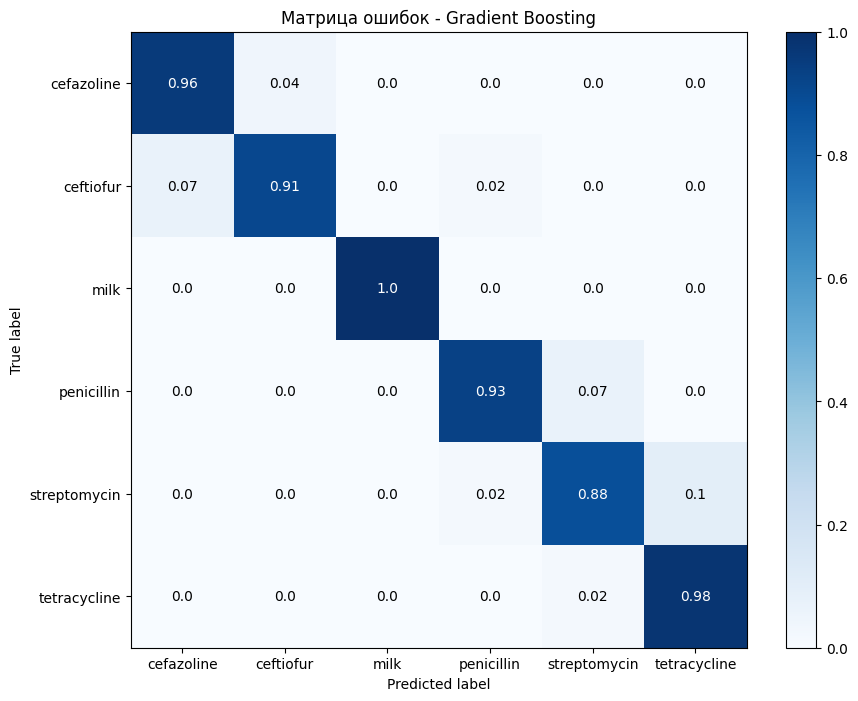

In [138]:
gb_model = model_train['Gradient Boosting']
y_pred_gb_new = label_encoder.inverse_transform(gb_model.predict(X_test_scaled))
y_test_new = label_encoder.inverse_transform(y_test)

skplt.metrics.plot_confusion_matrix(y_test_new, y_pred_gb_new, normalize=True, figsize=(10, 8), cmap="Blues")
plt.title("Матрица ошибок - Gradient Boosting")
plt.show()